# **Taller 04 Splines Cúbicos**

**Nombre:** Camila Caicedo

**Grupo:** GR1CC

**Fecha:** 24/11/2025

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

- **Complete el código del siguiente repositorio:**

https://github.com/ztjona/splines

In [1]:
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``
    xs must be different but not necessarily ordered nor equally spaced.
    
    ## Parameters
    - xs, ys: points to be interpolated
    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines (intervals)

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    # 1. Calcular el vector alpha (Lado derecho del sistema)
    # alpha[0] y alpha[n] se ignoran en el Spline Natural (o se fuerzan a 0)
    alpha = [0.0] * (n + 1)
    for i in range(1, n):
        # Fórmula correcta para alpha[i]:
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    # 2. Algoritmo de Thomas (Forward Sweep) para obtener z_i
    # l y u almacenan los coeficientes de la descomposición LU de la matriz A
    l = [1.0] * (n + 1) # Inicializado con 1.0 para coincidir con la implementación de Thomas
    u = [0.0] * n       # Inicializado con 0.0, solo se usa hasta n-1
    z = [0.0] * (n + 1) # Inicializado con 0.0

    # l[0]=1, u[0]=0, z[0]=0 (condición natural S''(x_0)=0)
    
    for i in range(1, n):
        # La fórmula en el código fuente parece usar una variante de Thomas para h_i * z_{i-1} + 2(h_{i-1}+h_i) * z_i + h_i * z_{i+1} = alpha_i
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        
        # 🌟 COMPLETAR Z: Forward substitution (Sustitución hacia adelante)
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    # z[n] = 0 (condición natural S''(x_n)=0)
    # l[n] = 1 (La última línea de la matriz triangular inferior L)
    # 3. Algoritmo de Thomas (Backward Sweep) para obtener los coeficientes c_j = S''(x_j) / 2
    
    c = [0.0] * (n + 1) # c_j = S''(x_j)/2. Usamos c_j para los coeficientes c_j del polinomio S_j(x)
                        # NOTA: En la fórmula estándar, c_j = S''(x_j) / 2.
                        # Aquí, c[j] se usa para almacenar los z_j=S''(x_j).

    # Back substitution (Sustitución hacia atrás)
    c[n] = 0.0 # S''(x_n) = 0
    
    for j in range(n - 1, -1, -1):
        # c[j] se está usando para almacenar S''(x_j) (es decir, z_j)
        c[j] = z[j] - u[j] * c[j + 1]
    
    # Ahora c contiene S''(x_j) para j=0 hasta n
    z = c # Renombramos c a z para claridad si se sigue la notación de la Pregunta 1 (donde z=S''):
          # z[j] = S''(x_j)

    x = sym.Symbol("x")
    splines = []
    
    # 4. Construir los polinomios (Sustitución hacia atrás)
    for j in range(n - 1, -1, -1):
        # Los coeficientes se calculan usando z[j] = S''(x_j)
        
        # c_j del polinomio (S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3)
        # c_j = S''(x_j) / 2
        C_poly = z[j] / 2
        
        # d_j del polinomio
        # d_j = (S''(x_{j+1}) - S''(x_j)) / (6 * h_j)
        d = (z[j + 1] - z[j]) / (6 * h[j])
        
        # b_j del polinomio
        # b_j = (y_{j+1} - y_j) / h_j - h_j * (S''(x_{j+1}) + 2 * S''(x_j)) / 6
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (z[j + 1] + 2 * z[j]) / 6
        
        # 🌟 COMPLETAR A: a_j del polinomio
        # a_j = y_j
        a = ys[j]
        
        print(f"J={j}: a={a:.3f}, b={b:.3f}, C_poly={C_poly:.3f}, d={d:.3f}")
        
        # 🌟 COMPLETAR S: Expresión simbólica del spline
        S = a + b * (x - xs[j]) + C_poly * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
        
    splines.reverse()
    return splines

# ###################################################################
# DATOS DE PRUEBA
# ###################################################################
xs = [0, 1, 2]
ys = [-5, -4, 3]

# Ejecutar el spline
splines = cubic_spline(xs=xs, ys=ys)

# Mostrar resultados
print("\n--- Resultados (Spline Cúbico Natural) ---")
print(f"Puntos: {list(zip(xs, ys))}")
print("\n[Fórmulas no expandidas]:")
_ = [display(s) for s in splines]
print("______")
print("\n[Fórmulas expandidas]:")
_ = [display(s.expand()) for s in splines]

J=1: a=-4.000, b=5.500, C_poly=2.250, d=-0.750
J=0: a=-5.000, b=0.250, C_poly=0.000, d=0.750

--- Resultados (Spline Cúbico Natural) ---
Puntos: [(0, -5), (1, -4), (2, 3)]

[Fórmulas no expandidas]:


0.75*x**3 + 0.25*x - 5

5.5*x - 0.75*(x - 1)**3 + 2.25*(x - 1)**2 - 9.5

______

[Fórmulas expandidas]:


0.75*x**3 + 0.25*x - 5

-0.75*x**3 + 4.5*x**2 - 1.25*x - 6.5

- **Compruebe gráficamente la solución de los siguientes ejercicios:**

**1.** (0,1),(1,5),(2,3)

$$S_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$
$$S_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$
$$S'_i(x) = b_i + 2c_i(x-x_i) + 3d_i(x-x_i)^2 $$
$$S''_i(x) = 2c_i + 6d_i(x-x_i) $$

- [1] $S_0(x_0) = y_0$
  
    $a_0 + b_0(x_0-x_0) + c_0(x_0-x_0)^2 + d_0(x_0-x_0)^3 = 1$

    $a_0=1$
- [2] $S_0(x_1) = y_1$
  
  $a_0 + b_0(x_1-x_0) + c_0(x_1-x_0)^2 + d_0(x_1-x_0)^3 = 5$

- [3] $S_1(x_1) = y_1$
  
  $a_1 + b_1(x_1-x_1) + c_1(x_1-x_1)^2 + d_1(x_1-x_1)^3 = 5$

  $a_1=5$

- [4] $S_1(x_2) = y_2$
  
  $a_1 + b_1(x_2-x_1) + c_1(x_2-x_1)^2 + d_1(x_2-x_1)^3 = 3$

- [5] $S'_0(x_1) = S'_1(x_1)$
  
  $b_0 + 2c_0(x_1-x_0) + 3d_0(x_1-x_0)^2 = b_1$

- [6] $S''_0(x_1) = S''_1(x_1)$
  
  $2c_0 + 6d_0(x_1-x_0)^3 = 2c_1$

- [7] $S''_0(x_0) = 0$
  
  $2c_0 + 6d_0(x_0-x_0) = 0$
  $c_0=0$

- [8] $S''_1(x_2) = 0$
  
  $2c_1 + 6d_1(x_2-x_1) = 0$

$a_0=1, b_0=5.5, c_0=0, d_0=-1.5, a_1=5, b_1=1, c_1=-4.5, d_1=1.5$

$$S_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$

$$S_0(x) = 1 + 5.5(x-0) + 0 - 1.5(x-0)^3 $$

$$S_0(x) = -1.5x^3+5.5x+1 $$

$$S_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$

$$S_1(x) = 5 + 1(x-1) + 4.5(x-1)^2 + 1.5(x-1)^3$$

$$S_1(x) = 1.5(x-1)^3 + 4.5(x-1)^2 + 1(x-1) +5 $$

$$
S(x)=
\begin{cases}
-1.5x^3+5.5x+1, & 0\le x\le 1,\\[8pt]
1.5(x-1)x^3+4.5(x-1)^2+1(x-1)+5, & 1\le x\le 2.
\end{cases}
$$

*Comprobación Gráfica*

S_0(x) en [0, 1]
a = 1  b = 5.5  c = 0.0  d = -1.5 

S_1(x) en [1, 2]
a = 5  b = 1.0  c = -4.5  d = 1.5 

=== Splines ===


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

=== Expandidos ===


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

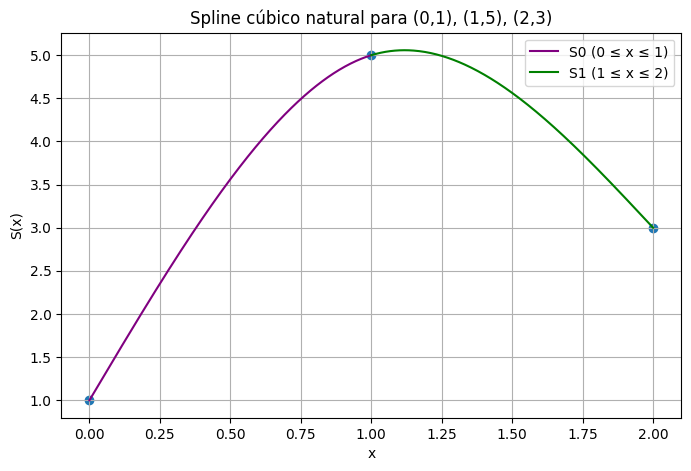

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]):
    """
    Cubic spline interpolation S. Every two points are interpolated by a cubic polynomial
    S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.

    xs must be different but not necessarily ordered nor equally spaced.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines
    h = [xs[i+1] - xs[i] for i in range(n)]

    # 1 — Compute α vector
    alpha = [0]* (n+1)
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])

    # 2 — Resolver el sistema
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append( 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1] )
        u.append( h[i] / l[i] )
        z.append( (alpha[i] - h[i-1]*z[i-1]) / l[i] )

    l.append(1)
    z.append(0)

    # coeficientes
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n
    a = ys[:]  # a_j = y_j

    # 3 — sustitucion
    for j in range(n-1, -1, -1):
        c[j] = z[j] - u[j]*c[j+1] if j < n else z[j]
        b[j] = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3 if j < n else 0
        d[j] = (c[j+1]-c[j])/(3*h[j]) if j < n else 0

    # 4 — Expresiones simbolicas
    x = sym.Symbol("x")
    splines = []

    for j in range(n):
        S = a[j] \
            + b[j]*(x - xs[j]) \
            + c[j]*(x - xs[j])**2 \
            + d[j]*(x - xs[j])**3
        splines.append(sym.simplify(S))

        print(f"S_{j}(x) en [{xs[j]}, {xs[j+1]}]")
        print("a =", a[j], " b =", b[j], " c =", c[j], " d =", d[j], "\n")

    return splines

xs = [0, 1, 2]
ys = [1, 5, 3]   

splines = cubic_spline(xs=xs, ys=ys)

print("=== Splines ===")
for S in splines:
    display(S)
print("=== Expandidos ===")
for S in splines:
    display(S.expand())

def S0(x):
    return -1.5*x**3 + 5.5*x + 1.0

def S1(x):
    return 1.5*x**3 -9.0*x**2 + 14.5*x -2.0

xx0 = np.linspace(0,1,300)
xx1 = np.linspace(1,2,300)

plt.figure(figsize=(8,5))
plt.plot(xx0, S0(xx0), label='S0 (0 ≤ x ≤ 1)', color='purple')
plt.plot(xx1, S1(xx1), label='S1 (1 ≤ x ≤ 2)', color='green')
plt.scatter([0,1,2], [1,5,3])

plt.grid(True)
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('Spline cúbico natural para (0,1), (1,5), (2,3)')
plt.legend()
plt.show()


**2.** (0,−5),(1,−4),(2,3)

$$S_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$
$$S_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$
$$S'_i(x) = b_i + 2c_i(x-x_i) + 3d_i(x-x_i)^2 $$
$$S''_i(x) = 2c_i + 6d_i(x-x_i) $$

- [1] $S_0(x_0) = y_0$
  
    $a_0 + b_0(x_0-x_0) + c_0(x_0-x_0)^2 + d_0(x_0-x_0)^3 = 1$

    $a_0=-5$
- [2] $S_0(x_1) = y_1$
  
  $a_0 + b_0(x_1-x_0) + c_0(x_1-x_0)^2 + d_0(x_1-x_0)^3 = -4$

- [3] $S_1(x_1) = y_1$
  
  $a_1 + b_1(x_1-x_1) + c_1(x_1-x_1)^2 + d_1(x_1-x_1)^3 = 5$

  $a_1=4$

- [4] $S_1(x_2) = y_2$
  
  $a_1 + b_1(x_2-x_1) + c_1(x_2-x_1)^2 + d_1(x_2-x_1)^3 = 3$

- [5] $S'_0(x_1) = S'_1(x_1)$
  
  $b_0 + 2c_0(x_1-x_0) + 3d_0(x_1-x_0)^2 = b_1$

- [6] $S''_0(x_1) = S''_1(x_1)$
  
  $2c_0 + 6d_0(x_1-x_0)^3 = 2c_1$

- [7] $S''_0(x_0) = 0$
  
  $2c_0 + 6d_0(x_0-x_0) = 0$
  $c_0=0$

- [8] $S''_1(x_2) = 0$
  
  $2c_1 + 6d_1(x_2-x_1) = 0$

$a_0=-5, b_0=-0.5, c_0=0, d_0=1.5, a_1=-4, b_1=4, c_1=4.5, d_1=-1.5$

$$S_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$

$$S_0(x) = -5 - 0.5(x-0) + 0 + 1.5(x-0)^3 $$

$$S_0(x) = 1.5x^3 - 0.5x -5 $$

$$S_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$

$$S_1(x) = -4 + 4(x-1) + 4.5(x-1)^2 - 1.5(x-1)^3$$


$$
S(x)=
\begin{cases}
1.5x^3 - 0.5x -5, & 0\le x\le 1,\\[8pt]
-4 + 4(x-1) + 4.5(x-1)^2 - 1.5(x-1)^3, & 1\le x\le 2.
\end{cases}
$$

*Comprobación Gráfica*

S_0(x) en [0, 1]
a = -5  b = -0.5  c = 0.0  d = 1.5 

S_1(x) en [1, 2]
a = -4  b = 4.0  c = 4.5  d = -1.5 

=== Splines ===


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

=== Expandidos ===


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

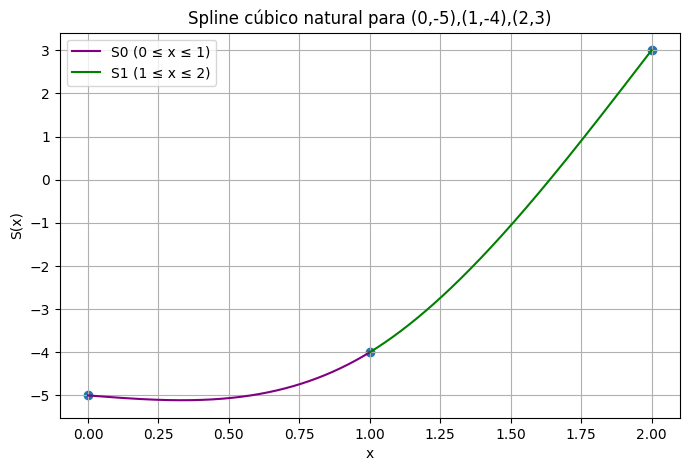

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]):
    """
    Cubic spline interpolation S. Every two points are interpolated by a cubic polynomial
    S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.

    xs must be different but not necessarily ordered nor equally spaced.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines
    h = [xs[i+1] - xs[i] for i in range(n)]

    # 1 — Compute α vector
    alpha = [0]* (n+1)
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])

    # 2 — Resolver el sistema
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append( 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1] )
        u.append( h[i] / l[i] )
        z.append( (alpha[i] - h[i-1]*z[i-1]) / l[i] )

    l.append(1)
    z.append(0)

    # coeficientes
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n
    a = ys[:]  # a_j = y_j

    # 3 — sustitucion
    for j in range(n-1, -1, -1):
        c[j] = z[j] - u[j]*c[j+1] if j < n else z[j]
        b[j] = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3 if j < n else 0
        d[j] = (c[j+1]-c[j])/(3*h[j]) if j < n else 0

    # 4 — Expresiones simbolicas
    x = sym.Symbol("x")
    splines = []

    for j in range(n):
        S = a[j] \
            + b[j]*(x - xs[j]) \
            + c[j]*(x - xs[j])**2 \
            + d[j]*(x - xs[j])**3
        splines.append(sym.simplify(S))

        print(f"S_{j}(x) en [{xs[j]}, {xs[j+1]}]")
        print("a =", a[j], " b =", b[j], " c =", c[j], " d =", d[j], "\n")

    return splines

xs = [0, 1, 2]
ys = [-5, -4, 3]  

splines = cubic_spline(xs=xs, ys=ys)

print("=== Splines ===")
for S in splines:
    display(S)
print("=== Expandidos ===")
for S in splines:
    display(S.expand())

# Define spline para (0,-5),(1,-4),(2,3)
def S0(x):
    return 1.5*x**3 - 0.5*x - 5

def S1(x):
    return -1.5*x**3 + 9*x**2 - 9.5*x - 2

xx0 = np.linspace(0,1,400)
xx1 = np.linspace(1,2,400)

plt.figure(figsize=(8,5))
plt.plot(xx0, S0(xx0), label='S0 (0 ≤ x ≤ 1)', color='purple')
plt.plot(xx1, S1(xx1), label='S1 (1 ≤ x ≤ 2)', color='green')
plt.scatter([0,1,2],[-5,-4,3])

plt.grid(True)
plt.xlabel("x")
plt.ylabel("S(x)")
plt.title("Spline cúbico natural para (0,-5),(1,-4),(2,3)")
plt.legend()
plt.show()


**3.** (0,−1),(1,1),(2,5),(3,2)

$$S_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$
$$S_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$
$$S'_i(x) = b_i + 2c_i(x-x_i) + 3d_i(x-x_i)^2 $$
$$S''_i(x) = 2c_i + 6d_i(x-x_i) $$

- [1] $S_0(x_0) = y_0$
  
    $a_0 + b_0(x_0-x_0) + c_0(x_0-x_0)^2 + d_0(x_0-x_0)^3 = -1$

    $a_0=-1$
- [2] $S_0(x_1) = y_1$
  
  $a_0 + b_0(x_1-x_0) + c_0(x_1-x_0)^2 + d_0(x_1-x_0)^3 = 1$

- [3] $S_1(x_1) = y_1$
  
  $a_1 + b_1(x_1-x_1) + c_1(x_1-x_1)^2 + d_1(x_1-x_1)^3 = 1$

  $a_1=1$

- [4] $S_1(x_2) = y_2$
  
  $a_1 + b_1(x_2-x_1) + c_1(x_2-x_1)^2 + d_1(x_2-x_1)^3 = 5$

- [5] $S_2(x_2) = y_2$

  $a_2 + b_2(x_2-x_2) + c_2(x_2-x_2)^2 + d_2(x_2-x_2)^3 = 5$

  $a_2 = 5$

- [6] $S_2(x_3) = y_3$

  $a_2 + b_2(x_3-x_2) + c_2(x_3-x_2)^2 + d_2(x_3-x_2)^3 = 2$

- [7] $S'_0(x_1) = S'_1(x_1)$
  
  $b_0 + 2c_0(x_1-x_0) + 3d_0(x_1-x_0)^2 = b_1$

- [8] $S'_1(x_2) = S'_2(x_2)$
  
  $b_1 + 2c_1(x_2-x_1) + 3d_1(x_2-x_1)^2 = b_2$

- [9] $S''_0(x_1) = S''_1(x_1)$
  
  $2c_0 + 6d_0(x_1-x_0) = 2c_1$

- [10] $S''_1(x_2) = S''_2(x_2)$
  
  $2c_1 + 6d_1(x_2-x_1) = 2c_2$

- [11] $S''_0(x_0) = 0$
  
  $2c_0 + 6d_0(x_0-x_0) = 0$
  $c_0=0$

- [12] $S''_2(x_3) = 0$
  
  $2c_2 + 6d_2(x_3-x_2) = 0$

$a_0=-1, b_0=1, c_0=0, d_0=1, a_1=1, b_1=4, c_1=3, d_1=-3, a_2=5, b_2=1, c_2=-6, d_2=2$

$$S_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3 $$

$$S_0(x) = -1 + 1(x-0) + 0 + 1(x-0)^3 $$

$$S_0(x) = x^3 + x -1 $$

$$S_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$

$$S_1(x) = 1 + 4(x-1) + 3(x-1)^2 - 3(x-1)^3$$

$$S_2(x) = a_2 + b_2(x-x_2) + c_2(x-x_2)^2 + d_2(x-x_2)^3$$

$$S_2(x) = 5 + 1(x-2) - 6(x-2)^2 + 2(x-2)^3$$

$$
S(x)=
\begin{cases}
x^3 + x -1, & 0\le x\le 1,\\[8pt]
1 + 4(x-1) + 3(x-1)^2 - 3(x-1)^3, & 1\le x\le 2,\\[8pt] 
5 + 1(x-2) - 6(x-2)^2 + 2(x-2)^3, & 2\le x\le 3.
\end{cases}
$$

*Comprobación Gráfica*

S_0(x) en [0, 1]
a = -1  b = 1.0  c = 0.0  d = 1.0 

S_1(x) en [1, 2]
a = 1  b = 4.0  c = 3.0  d = -3.0 

S_2(x) en [2, 3]
a = 5  b = 1.0  c = -6.0  d = 2.0 

=== Splines ===


1.0*x**3 + 1.0*x - 1.0

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

=== Expandidos ===


1.0*x**3 + 1.0*x - 1.0

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

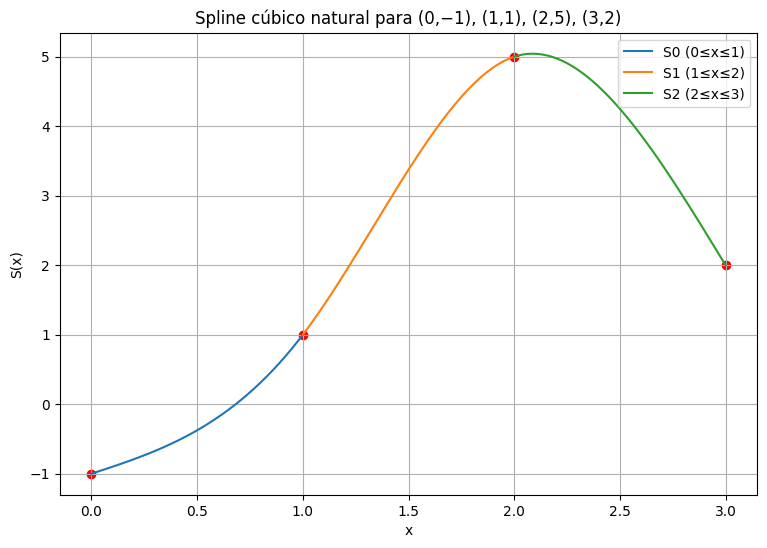

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]):
    """
    Cubic spline interpolation S. Every two points are interpolated by a cubic polynomial
    S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # Ordenar
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  
    h = [xs[i+1] - xs[i] for i in range(n)]

    # 1 — Compute α vector
    alpha = [0]* (n+1)
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])

    # 2 — Resolver sistema tridiagonal
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i-1]*z[i-1]) / l[i])

    l.append(1)
    z.append(0)

    # coeficientes
    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n
    a = ys[:]   # a_j = y_j

    # Sustitución hacia atrás
    for j in range(n-1, -1, -1):
        c[j] = z[j] - u[j]*c[j+1] if j < n else z[j]
        b[j] = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3 if j < n else 0
        d[j] = (c[j+1]-c[j])/(3*h[j]) if j < n else 0

    # Expresiones simbólicas
    x = sym.Symbol("x")
    splines = []

    for j in range(n):
        S = a[j] \
            + b[j]*(x - xs[j]) \
            + c[j]*(x - xs[j])**2 \
            + d[j]*(x - xs[j])**3

        splines.append(sym.simplify(S))

        print(f"S_{j}(x) en [{xs[j]}, {xs[j+1]}]")
        print("a =", a[j], " b =", b[j], " c =", c[j], " d =", d[j], "\n")

    return splines

# ==== DATOS DEL EJERCICIO  ====
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)

print("=== Splines ===")
for S in splines:
    display(S)

print("=== Expandidos ===")
for S in splines:
    display(S.expand())

# ====== Graficar spline ======

def spline_func(S, x0):
    """Convierte un spline simbólico a función numérica."""
    f = sym.lambdify(sym.Symbol("x"), S, modules="numpy")
    return lambda x: f(x)

S0 = spline_func(splines[0], 0)
S1 = spline_func(splines[1], 1)
S2 = spline_func(splines[2], 2)

xx0 = np.linspace(0,1,200)
xx1 = np.linspace(1,2,200)
xx2 = np.linspace(2,3,200)

plt.figure(figsize=(9,6))
plt.plot(xx0, S0(xx0), label='S0 (0≤x≤1)')
plt.plot(xx1, S1(xx1), label='S1 (1≤x≤2)')
plt.plot(xx2, S2(xx2), label='S2 (2≤x≤3)')

plt.scatter(xs, ys, color='red')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("S(x)")
plt.title("Spline cúbico natural para (0,−1), (1,1), (2,5), (3,2)")
plt.legend()
plt.show()


- **Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $B_0=1$ para todos los valores de $B_1 ∈ R$.**

In [10]:
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline_clamped(xs, ys, B0, B1):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [0,1,2]
    ys = [1,5,3]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    alpha[0] = 3/h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3/h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3/h[i] * (ys[i + 1] - ys[i]) - 3/h[i - 1] * (ys[i] - ys[i - 1])

    l = [2*h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l.append(2*(xs[i + 1] - xs[i - 1]) - h[i-1]*u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1]*z[i - 1]) / l[i])

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1]*z[n - 1]) / l[n])

    c = [0] * (n + 1)
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2*c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]

        print(f"Intervalo {j}: [{xs[j]}, {xs[j+1]}]")
        print("a =", a, " b =", b, " c =", c[j], " d =", d)
        print()

        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3
        splines.append(S)

    splines.reverse()
    return splines


- **Realice una animación de la variación de los splines cúbicos al variar $B_1$**